# Title: "New Location Selection on CroqPain restaurant chain" (Python)
### Author: "Sangho Lee"
### Date: "2023-12-28"

### Michel's Task: Finding the Best 10 New Locations Using Regression Analysis with Data from 60 Existing Locations

### I have a dataset containing information on 60 locations, described as follows:

## Croq'Pain

Data on store earnings and other characteristics for the Croq'Pain case. There should be a total of 60 different stores and 10 potential new outlets. The model used for forecasting should be built on data for the existing 60 stores.

### Variables

-   STOR: Store ID
-   CITY: City in the which store is located. Only provided for potential new outlets
-   EARN: Earnings in \$1,000. Operating earnings: annual sales minus annual operating costs. Operating costs exclude the fixed costs of property rent and equipment rental (all capital equipment is purchased by headquarters and rented to the stores). Operating costs include variable costs such as salaries, utilities, supplies, inventories and other expenses.
-   K: Capital invested in the store in \$1,000. This amount is exactly equal to the purchase price of the property (or the lease, in some cases) plus the cost of all equipment and the cost of remodeling the space.
-   SIZE: Size of store in square meters: Total area inside the store
-   EMPL: Number of employees. Not determined until store is opened
-   P15: Number of 15-24 year olds in a 3 km radius around site in 1,000s
-   P25: Number of 25-34 year olds in a 3 km radius around site 1,000s
-   P35: Number of 35-44 year olds in a 3 km radius around site 1,000s
-   P45: Number of 45-54 year olds in a 3 km radius around site 1,000s
-   P55: Number of persons above 55 in a 3 km radius around site 1,000s
-   total: Total population in 3 km radius around site 1,000s
-   INC: Average income in \$1,000 in town or neighborhood around site
-   COMP: Number of competitors in a 1 km radius around site. Establishments considered as competitors include fast food restaurants, bars and cafes equipped providing lunch service
-   NCOMP: Number of restaurants that do not compete directly with CroqPain in 1 km radius around site
-   NREST: Number of non-restaurant businesses in 1 km radius around site
-   PRICE: Monthly rent per square meter of the retail properties in the same locale.
-   CLI = Cost of Living Index. Measures the cost of living in the immediate vicinity to the restaurant site. Aggregate of average cost of living index determined by the commerce department and additional economic measures taken by experts on site
-   CITY: City name for potential new locations

### Now, I will generate a correlation table to examine the relevance of each data point to the "EARN" column, which is our target variable for prediction.

Before analyzing the data, let's load the necessary packages in Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyrsm as rsm


## 1. Data Preparation
#### Load/read the data

In [2]:
croqpain = pd.read_parquet('CroqPain.parquet')


In [3]:
croqpain

,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,CITY
0,1,28339.672620,861.0718,129,14.0,8.58,0.98,1.28,0.56,1.000,3.10,27.6,8,1,45,16.1,129,
1,2,-1.455001,630.3028,91,12.0,8.46,1.29,0.72,1.20,1.490,3.10,28.3,2,2,27,11.4,116,
2,3,68.932678,1074.4360,140,13.0,19.25,2.94,2.49,3.71,4.030,5.27,30.2,5,4,5,21.7,142,
3,4,202.073327,882.0064,184,7.0,20.92,3.57,4.93,4.42,4.300,2.96,27.6,2,1,7,11.8,138,
4,5,115.778511,930.6688,144,14.0,11.66,1.70,1.14,2.20,2.140,2.63,33.9,1,3,25,16.6,126,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,66,NaN,924.8080,197,NaN,12.72,1.65,1.96,2.30,1.780,4.39,23.0,1,9,41,12.0,136,Marseilles-1
66,67,NaN,1089.5764,93,NaN,16.66,2.57,2.94,2.82,2.720,4.45,25.2,2,0,5,33.4,133,Marseilles-2
67,68,NaN,737.6620,169,NaN,9.41,0.78,1.94,0.88,1.080,3.45,30.1,4,4,11,9.0,126,Clermont
68,69,NaN,584.0000,149,NaN,19.02,2.50,2.68,4.60,4.567,3.00,28.6,4,5,26,13.4,128,Montpellier


In [4]:
# Checking the data types of each column
data_types = croqpain.dtypes
data_types

STOR       int32
EARN     float64
K        float64
SIZE       int32
EMPL     float64
total    float64
P15      float64
P25      float64
P35      float64
P45      float64
P55      float64
INC      float64
COMP       int32
NCOMP      int32
NREST      int32
PRICE    float64
CLI        int32
CITY      object
dtype: object

#### The data preparation step is complete.
#### The croqpain dataset includes information such as Store #, Earnings, Capital invested, size of the store, Age demographics, Population of the city, City Name, Competitor's information etc,.

#### Considering the data types, all values are numeric and represent continuous variables, making them suitable for a linear regression model.

## 2. Feature Engineering

### In preparing our dataset for regression analysis aimed at predicting potential earnings for new CroqPain locations, it's crucial to examine the existing data from 60 stores closely. By understanding the relationship between store characteristics and their operating earnings, we can identify key factors that influence profitability.

### Target Variable Transformation (EARN):
- The target variable for our model is the store's earnings (EARN), which represents the annual operating profit in thousands of dollars. This continuous variable doesn't require transformation into a binary outcome but will be directly used to predict the profitability of potential new locations.

### Selecting Relevant Features: To predict future earnings effectively, I prioritize features based on their potential impact on a store's performance (Intuitively before looking at the statistics from the model). These include:
- Capital investment (K), as it reflects the initial financial commitment and possibly the quality of the store's infrastructure.
- Store size (SIZE), which could affect the number of customers it can serve at any given time.
- Demographics within a 3 km radius (P15, P25, P35, P45, P55, and total), indicating the target market size and composition.
- Average income in the surrounding area (INC), to gauge the purchasing power of the potential clientele.
- The number of competitors (COMP) and non-competitors (NCOMP) nearby, which affects market saturation and potential customer base.
- Cost of living index (CLI) and price of retail properties (PRICE), providing insight into the economic environment of the location.

### By analyzing these factors, we aim to build a robust model that can estimate the earnings of new stores with a high degree of accuracy. This process involves not just selecting variables that are intuitively linked to earnings but also using statistical methods to confirm their predictive power and relevance. Through this meticulous approach, we can guide the decision-making process on where to establish new CroqPain outlets for maximum profitability.

In [5]:
# Selecting relevant features
croqpqin_features = croqpain[
    ['EARN', 'K', 'SIZE', 'EMPL', 'total', 'P15', 'P25', 'P35', 'P45', 'P55', 'INC', 'COMP', 'NCOMP', 'NREST', 'PRICE', 'CLI']
]
croqpqin_features

,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI
0,28339.672620,861.0718,129,14.0,8.58,0.98,1.28,0.56,1.000,3.10,27.6,8,1,45,16.1,129
1,-1.455001,630.3028,91,12.0,8.46,1.29,0.72,1.20,1.490,3.10,28.3,2,2,27,11.4,116
2,68.932678,1074.4360,140,13.0,19.25,2.94,2.49,3.71,4.030,5.27,30.2,5,4,5,21.7,142
3,202.073327,882.0064,184,7.0,20.92,3.57,4.93,4.42,4.300,2.96,27.6,2,1,7,11.8,138
4,115.778511,930.6688,144,14.0,11.66,1.70,1.14,2.20,2.140,2.63,33.9,1,3,25,16.6,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,924.8080,197,NaN,12.72,1.65,1.96,2.30,1.780,4.39,23.0,1,9,41,12.0,136
66,NaN,1089.5764,93,NaN,16.66,2.57,2.94,2.82,2.720,4.45,25.2,2,0,5,33.4,133
67,NaN,737.6620,169,NaN,9.41,0.78,1.94,0.88,1.080,3.45,30.1,4,4,11,9.0,126
68,NaN,584.0000,149,NaN,19.02,2.50,2.68,4.60,4.567,3.00,28.6,4,5,26,13.4,128


# 3. Exploratory Data Analysis:
#### Examine the distributions of the features and target variable.
#### Look for correlations between features and the target variable to understand the relationships better.

#### Correlations: In the dataset, certain variables show notable correlations with the target variable "EARN". For instance, the number of competitors (COMP) has a positive correlation with earnings, suggesting that stores located in areas with more competitors tend to have higher earnings. This could indicate a busy area with high foot traffic, leading to increased sales. Conversely, demographic variables such as the number of 15-24 year olds (P15), 25-34 year olds (P25), and the 35-44 year olds (P35) show negative correlations with earnings, implying that a higher population of these age groups in the vicinity might not be conducive to higher earnings for CroqPain stores. The cost of living index (CLI) and the capital invested (K) have positive correlations with earnings, albeit very slight, suggesting that stores in areas with higher living costs and those with more capital investment might perform slightly better in terms of earnings.

#### See below!


In [7]:
correlation_matrix = croqpqin_features.corr()
correlation_matrix

,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI
EARN,1.000000,0.017857,0.037843,0.117171,-0.198124,-0.211101,-0.143079,-0.217961,-0.205899,-0.104255,-0.136743,0.264273,-0.186888,0.099019,-0.013165,0.020237
K,0.017857,1.000000,0.725028,0.039449,0.012089,-0.017858,-0.039352,-0.022125,-0.023373,0.135287,0.114064,-0.289702,-0.137783,-0.114739,0.582139,0.201289
SIZE,0.037843,0.725028,1.000000,0.051983,-0.047280,-0.039086,-0.080267,-0.041294,-0.061568,-0.001826,0.123599,-0.154764,0.039719,-0.015441,-0.037055,0.085600
EMPL,0.117171,0.039449,0.051983,1.000000,-0.099301,-0.095293,-0.023749,-0.115835,-0.105221,-0.090102,0.089947,0.121083,0.112134,-0.157576,0.076056,0.138959
total,-0.198124,0.012089,-0.047280,-0.099301,1.000000,0.949753,0.596107,0.959521,0.951690,0.789532,0.050194,-0.244136,0.037083,0.039686,0.037719,0.150707
P15,-0.211101,-0.017858,-0.039086,-0.095293,0.949753,1.000000,0.472971,0.966501,0.942112,0.681257,0.126240,-0.210145,0.050125,0.082196,-0.013362,0.174587
P25,-0.143079,-0.039352,-0.080267,-0.023749,0.596107,0.472971,1.000000,0.470313,0.433551,0.325006,0.031893,-0.092875,0.054960,-0.003444,0.091182,0.090186
P35,-0.217961,-0.022125,-0.041294,-0.115835,0.959521,0.966501,0.470313,1.000000,0.965146,0.688112,0.067611,-0.196131,0.032780,0.086316,-0.015571,0.152135
P45,-0.205899,-0.023373,-0.061568,-0.105221,0.951690,0.942112,0.433551,0.965146,1.000000,0.671030,0.081211,-0.201115,0.070531,0.086940,-0.001652,0.169326
P55,-0.104255,0.135287,-0.001826,-0.090102,0.789532,0.681257,0.325006,0.688112,0.671030,1.000000,-0.086892,-0.271882,-0.026572,-0.048648,0.124438,0.091578


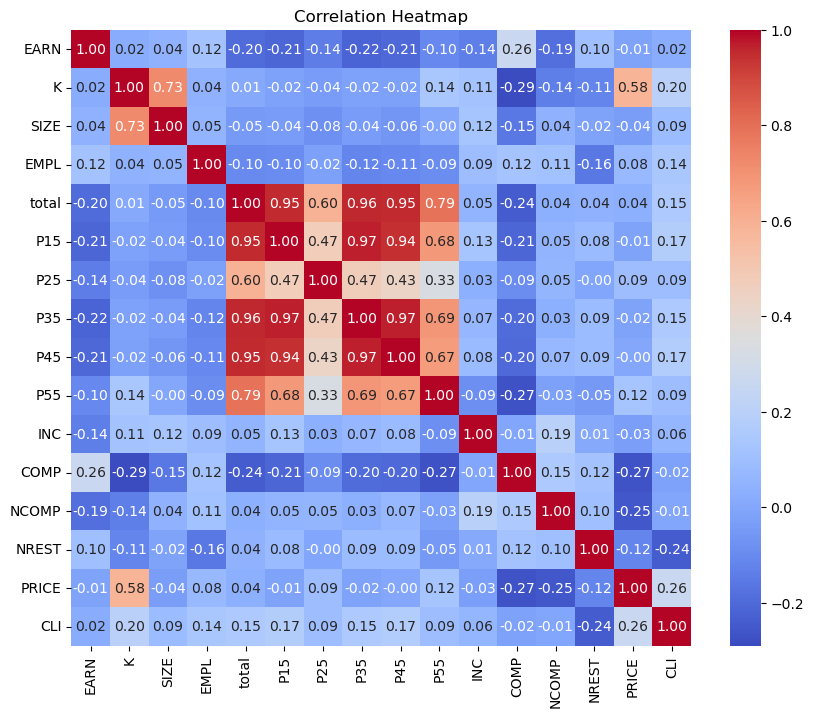

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(croqpqin_features.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4. Model Building:

### I will build a regression model and let's see if this data fits a good model

- A new column, 'training', has been effectively incorporated into 'croqpqin_features'. Data from the existing 60 locations will serve as the training set, while the 10 new candidate locations will be utilized for testing and prediction.
- new "train" column: 1 -> train, 0 -> test. 

In [9]:
croqpqin_features['train'] = np.where(croqpqin_features['EARN'].isna(), 0, 1)
croqpqin_features

/tmp/ipykernel_61900/1655671397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  croqpqin_features['train'] = np.where(croqpqin_features['EARN'].isna(), 0, 1)


,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,train
0,28339.672620,861.0718,129,14.0,8.58,0.98,1.28,0.56,1.000,3.10,27.6,8,1,45,16.1,129,1
1,-1.455001,630.3028,91,12.0,8.46,1.29,0.72,1.20,1.490,3.10,28.3,2,2,27,11.4,116,1
2,68.932678,1074.4360,140,13.0,19.25,2.94,2.49,3.71,4.030,5.27,30.2,5,4,5,21.7,142,1
3,202.073327,882.0064,184,7.0,20.92,3.57,4.93,4.42,4.300,2.96,27.6,2,1,7,11.8,138,1
4,115.778511,930.6688,144,14.0,11.66,1.70,1.14,2.20,2.140,2.63,33.9,1,3,25,16.6,126,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,924.8080,197,NaN,12.72,1.65,1.96,2.30,1.780,4.39,23.0,1,9,41,12.0,136,0
66,NaN,1089.5764,93,NaN,16.66,2.57,2.94,2.82,2.720,4.45,25.2,2,0,5,33.4,133,0
67,NaN,737.6620,169,NaN,9.41,0.78,1.94,0.88,1.080,3.45,30.1,4,4,11,9.0,126,0
68,NaN,584.0000,149,NaN,19.02,2.50,2.68,4.60,4.567,3.00,28.6,4,5,26,13.4,128,0


In [10]:
final_data_train = croqpqin_features[croqpqin_features['train'] == 1]

lr = rsm.regress(
    data=final_data_train, 
    rvar='EARN', 
    evar=[
        'K', 'SIZE', 'EMPL', 'total', 'P15', 'P25', 'P35', 'P45', 'P55', 'INC', 'COMP', 'NCOMP', 'NREST', 'PRICE', 'CLI'
    ]
)

lr.summary()

Linear regression (OLS)
Data                 : Not provided
Response variable    : EARN
Explanatory variables: K, SIZE, EMPL, total, P15, P25, P35, P45, P55, INC, COMP, NCOMP, NREST, PRICE, CLI
Null hyp.: the effect of x on EARN is zero
Alt. hyp.: the effect of x on EARN is not zero

           coefficient  std.error  t.value p.value   
Intercept    -4455.993   9977.876   -0.447   0.657   
K               -3.638     10.901   -0.334    0.74   
SIZE            18.368     42.489    0.432   0.668   
EMPL            85.843    152.254    0.564   0.576   
total          911.195   1282.990    0.710   0.481   
P15           -897.804   2726.160   -0.329   0.743   
P25          -1054.648   1374.499   -0.767   0.447   
P35          -1975.644   2226.114   -0.887    0.38   
P45           -313.898   3252.809   -0.097   0.924   
P55           -548.518   1415.913   -0.387     0.7   
INC            -50.515    174.146   -0.290   0.773   
COMP           420.419    229.337    1.833   0.074  .
NCOMP        

#### The output from the linear regression analysis provides critical insights into the factors that influence the earnings of CroqPain stores:

#### Coefficients: The coefficients indicate the expected change in store earnings (EARN) for a one-unit increase in the predictor variable, keeping all other variables constant.
- For example, the coefficient for EMPLOYEES (EMPL) is 85.843, suggesting that each additional employee is associated with an increase in earnings of approximately 85.843 dollars, although this effect is not statistically significant (p = 0.576).

#### P-Values: These values assess the statistical significance of each coefficient. A p-value less than 0.05 would suggest a statistically significant impact on earnings.
- Notably, most variables have high p-values, indicating their effects on earnings are not statistically significant in this model. However, COMP (number of competitors) has a p-value of 0.074, which is close to the threshold of significance, suggesting a potential positive impact on earnings, albeit marginally not significant.

#### R-squared and Adjusted R-squared: The R-squared value of 0.213 indicates that approximately 21.3% of the variability in earnings can be explained by the model. The Adjusted R-squared is -0.055, which, being negative, suggests that the model may not fit the data well and that some predictors might not contribute useful information.

#### F-Statistic: The F-statistic and its p-value (0.794 and 0.677, respectively) indicate the model does not significantly explain the variance in earnings across the stores when considering all predictors together.

#### Key Takeaways:
- The model's overall lack of statistical significance suggests that the selected variables may not strongly predict earnings for CroqPain stores, or the relationships might not be linear.
- The negative Adjusted R-squared value raises concerns about the model's explanatory power, indicating that it might be overfitted with irrelevant predictors or that the linear model is not the best fit for this data.
- The COMP variable shows a borderline significant positive relationship with earnings, hinting that a moderate level of competition might be beneficial, possibly due to increased customer traffic in areas with more food service options.

#### Considerations for Improvement:
- Model refinement is necessary, possibly by removing variables that do not contribute significantly to the model or exploring non-linear relationships.
Additional data or a different analytical approach, such as incorporating interaction terms or using a different type of regression model, might yield more insightful results.

#### We might consider looking the permutation and visiting prediction plots as a potential strategy for enhancing this model.

None


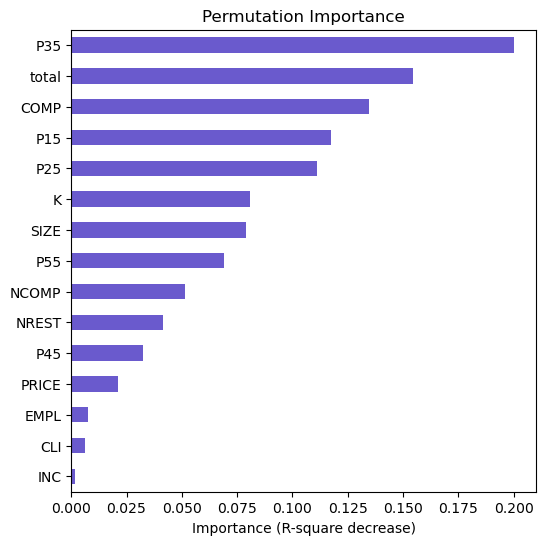

In [11]:
# Plot variable importance
print(lr.plot(plots="vimp"))

None


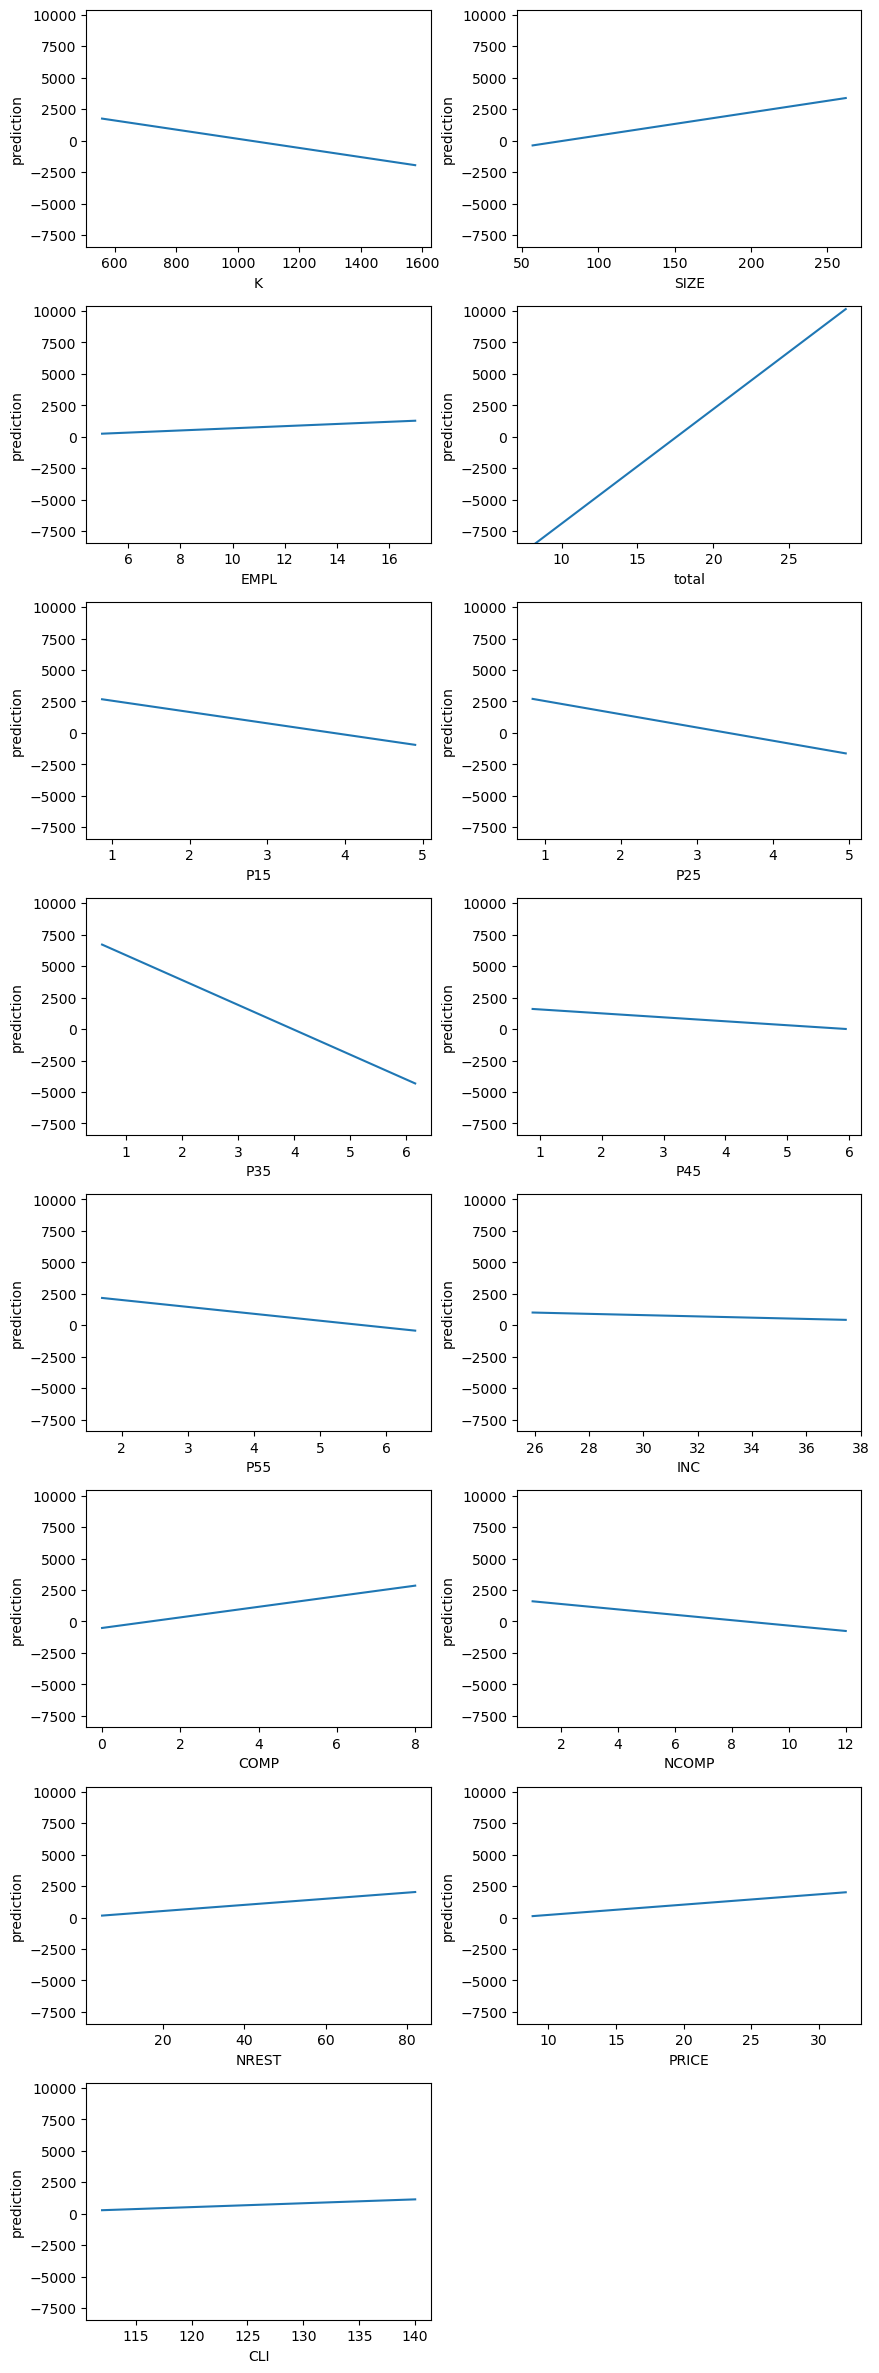

In [12]:
# Plot predictions
print(lr.plot(plots="pred", incl=[ 'K', 'SIZE', 'EMPL', 'total', 'P15', 'P25', 'P35', 'P45', 'P55', 'INC', 'COMP', 'NCOMP', 'NREST', 'PRICE', 'CLI']))

Permutation in the context of machine learning, specifically in model interpretation, refers to Permutation Importance. It is a technique used to determine the importance of different features used by a model. In this technique, the importance of a feature is calculated by permuting the values of the feature and measuring the decrease in the model's performance. The idea is that if a feature is important, randomly shuffling its values will decrease the model performance significantly. Conversely, if a feature is not important, shuffling its values should have little to no effect on the model's performance.

#### In this cae, 'P35', 'total', and 'COMP' are identified as having the highest importance level, meaning that permuting these features likely resulted in a significant decrease in the model's performance.


#### For the prediction's plot, 'Size' and 'total' stand out. 
#### Now let's remodel using 'P35', 'total', 'COMP', and 'Size'


In [13]:
lr_2 = rsm.regress(
    data=final_data_train, 
    rvar='EARN', 
    evar=[
        'P35', 'total', 'COMP', 'SIZE'
    ]
)

lr_2.summary()

Linear regression (OLS)
Data                 : Not provided
Response variable    : EARN
Explanatory variables: P35, total, COMP, SIZE
Null hyp.: the effect of x on EARN is zero
Alt. hyp.: the effect of x on EARN is not zero

           coefficient  std.error  t.value p.value   
Intercept     -584.377   2475.514   -0.236   0.814   
P35           -835.022    997.319   -0.837   0.406   
total          130.058    281.538    0.462   0.646   
COMP           390.669    196.681    1.986   0.052  .
SIZE             5.073      8.721    0.582   0.563   

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.114, Adjusted R-squared: 0.049
F-statistic: 1.766 df(4, 55), p.value 0.149
Nr obs: 60


None
None


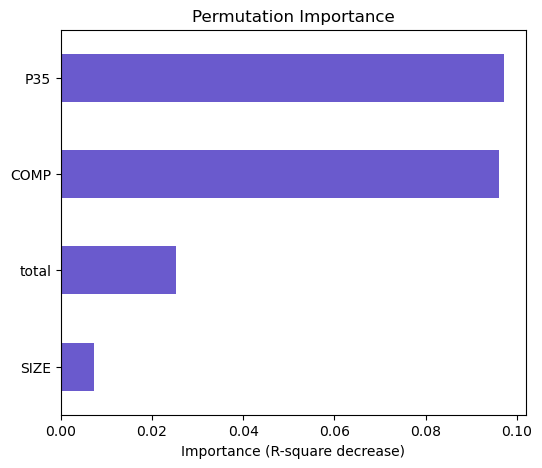

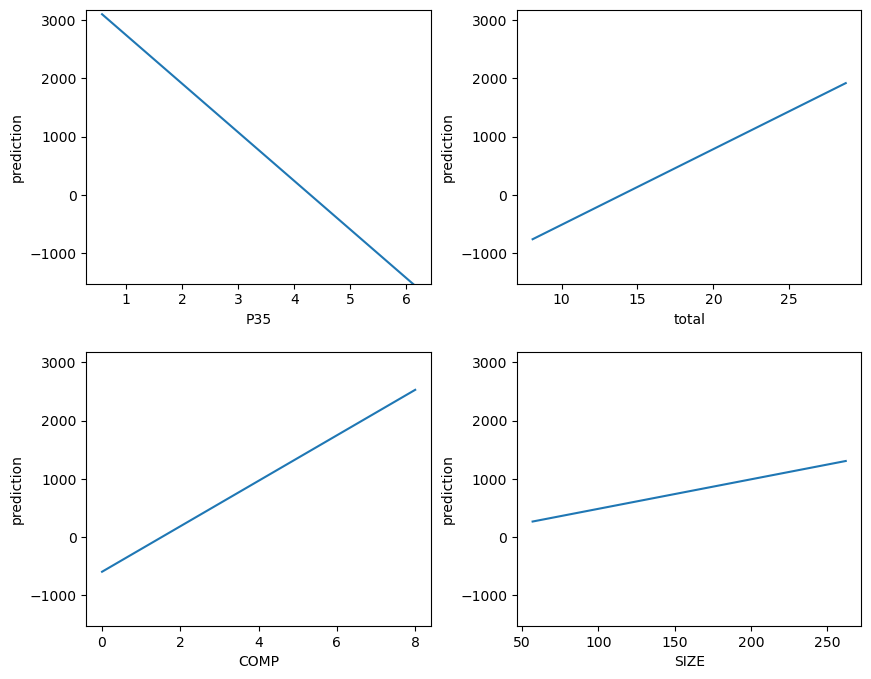

In [14]:
print(lr_2.plot(plots="vimp"))
print(lr_2.plot(plots="pred", incl=['P35', 'total', 'COMP', 'SIZE']))

#### The revised output from the linear regression model, focusing on a subset of variables to predict CroqPain store earnings (EARN), offers new insights:
#### Coefficients: These values estimate the expected change in the target variable (EARN) for a one-unit increase in the predictor variable, holding all other variables constant.
- P35: A coefficient of -835.022 suggests that an increase of 1,000 individuals in the 35-44 age group within a 3 km radius decreases the store's earnings by approximately $835. This effect, however, is not statistically significant (p-value = 0.406).
- total: The coefficient for total population within a 3 km radius is 130.058, indicating a slight positive impact on earnings, although this too lacks statistical significance (p-value = 0.646).
- COMP: The number of competitors within a 1 km radius has a positive coefficient of 390.669, suggesting that more competitors are associated with an increase in earnings, potentially due to a bustling area drawing more foot traffic. This variable approaches statistical significance (p-value = 0.052), hinting at a potentially interesting relationship worth further exploration.
- SIZE: The store size has a small positive coefficient of 5.073, implying a marginal increase in earnings with larger store sizes, though this effect is not statistically significant (p-value = 0.563).

#### Significance:
- The p-values for all predictors indicate that, at conventional levels of significance, none of the variables decisively predict earnings, with COMP being the only variable close to reaching statistical significance.

#### Model Fit:
- The R-squared value of 0.114 suggests that only about 11.4% of the variability in earnings is explained by the model, which is relatively low, indicating a weak fit.
- The Adjusted R-squared of 0.049 adjusts for the number of predictors and shows an even lower proportion of variance explained, reinforcing the model's limited explanatory power.

#### F-statistic:
- The F-statistic value of 1.766 with a p-value of 0.149 suggests that the model, as a whole, does not significantly explain the variation in earnings across the stores, indicating that the selected variables may not be the best predictors of EARN.

#### Key Takeaways:
- This model highlights the challenges in predicting store earnings based on the selected variables. The proximity of the COMP variable to significance suggests that the competitive environment might have an interesting effect on earnings, potentially warranting further investigation with additional data or alternative modeling approaches.
The lack of significant predictors and the low R-squared values suggest a need for revisiting the selection of variables, possibly incorporating additional factors or interactions that might better capture the complexities influencing store earnings.
Given the current findings, stakeholders should exercise caution in using this model for making investment or operational decisions for new locations without further refinement and validation.

In [15]:
lr_3 = rsm.regress(
    data=final_data_train, 
    rvar='EARN', 
    evar=[
        'COMP'
    ]
)

lr_3.summary()

Linear regression (OLS)
Data                 : Not provided
Response variable    : EARN
Explanatory variables: COMP
Null hyp.: the effect of x on EARN is zero
Alt. hyp.: the effect of x on EARN is not zero

           coefficient  std.error  t.value p.value   
Intercept     -621.609    748.402   -0.831    0.41   
COMP           398.846    191.125    2.087   0.041  *

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.07, Adjusted R-squared: 0.054
F-statistic: 4.355 df(1, 58), p.value 0.041
Nr obs: 60


None


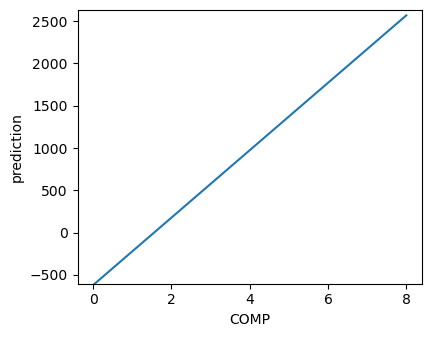

In [16]:
print(lr_3.plot(plots="pred", incl=['COMP']))


#### This 3rd time refined linear regression model focusing solely on the number of competitors (COMP) as an explanatory variable for the earnings (EARN) of CroqPain stores provides the following insights:

#### Coefficient for COMP: The model estimates a coefficient of 398.846 for COMP, indicating that an increase of one competitor within a 1 km radius is associated with an increase in annual earnings by approximately $398,846. This result is counterintuitive in a traditional competitive market scenario where increased competition might be expected to lower individual store earnings. However, it could suggest a market dynamic where a higher number of competitors actually drives more customer traffic to the area, potentially benefiting all businesses.

#### P-Value for COMP: With a p-value of 0.041, the effect of COMP on EARN is statistically significant at the 5% level. This suggests that there is a less than 5% chance that the observed association is due to random fluctuation, thereby providing evidence against the null hypothesis and indicating a real effect of competition on earnings.

#### R-Squared: The R-squared value is 0.07, indicating that approximately 7% of the variance in CroqPain stores' earnings can be explained by the number of competitors alone. Although this demonstrates some level of association, it also suggests that other factors not included in the model could be influencing earnings.

#### Adjusted R-Squared: The adjusted R-squared value of 0.054 adjusts for the number of predictors in the model and suggests that after accounting for the number of variables, the amount of variance explained by the model is slightly lower. This highlights the simplicity of the model but also points to its limited explanatory power.

#### F-Statistic and Model Significance: The F-statistic is 4.355 with a p-value of 0.041, indicating that the model is statistically significant at the 5% level. This suggests that there is sufficient evidence to conclude that the number of competitors has an overall significant effect on the earnings of CroqPain stores across the dataset.

#### Key Takeaway:
- The analysis indicates a significant positive relationship between the number of competitors and CroqPain store earnings, suggesting that a higher concentration of competitors might be beneficial to CroqPain’s earnings. However, given the relatively low R-squared value, it's clear that other variables not considered in this model also play a significant role in determining store earnings.

### Subsequently, I will use the test dataset to forecast the earnings for the ten new locations.

#### Prediction of EARN Using COMP
##### To predict EARN using this model, I can apply the formula:

#### EARN = −621.609 + 398.846 × COMP


In [32]:
croqpain_new_loc = croqpain[croqpain['EARN'].isna()]
croqpain_new_loc['Prediction'] = -621.609 + 398.846 * croqpain_new_loc['COMP']
croqpain_new_loc

/tmp/ipykernel_61900/1673219310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  croqpain_new_loc['Prediction'] = -621.609 + 398.846 * croqpain_new_loc['COMP']


,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,CITY,Prediction
60,61,NaN,660.1396,54,NaN,6.71,0.60,2.57,0.43,0.690,1.44,38.4,4,5,18,21.7,131,Calais,973.775
61,62,NaN,733.0000,120,NaN,11.04,1.30,1.40,2.11,1.090,2.68,31.3,7,6,21,12.5,115,Montchanin,2170.313
62,63,NaN,1050.3490,135,NaN,11.91,2.21,1.85,2.33,2.240,2.17,29.0,1,4,13,21.7,135,Aubusson,-222.763
63,64,NaN,836.0000,245,NaN,11.35,3.40,3.00,2.57,1.200,1.35,37.0,5,8,62,12.5,136,Toulouse,1372.621
64,65,NaN,783.6160,96,NaN,3.50,0.26,0.70,0.50,1.200,2.00,30.0,12,7,38,18.0,130,Torcy,4164.543
65,66,NaN,924.8080,197,NaN,12.72,1.65,1.96,2.30,1.780,4.39,23.0,1,9,41,12.0,136,Marseilles-1,-222.763
66,67,NaN,1089.5764,93,NaN,16.66,2.57,2.94,2.82,2.720,4.45,25.2,2,0,5,33.4,133,Marseilles-2,176.083
67,68,NaN,737.6620,169,NaN,9.41,0.78,1.94,0.88,1.080,3.45,30.1,4,4,11,9.0,126,Clermont,973.775
68,69,NaN,584.0000,149,NaN,19.02,2.50,2.68,4.60,4.567,3.00,28.6,4,5,26,13.4,128,Montpellier,973.775
69,70,NaN,681.0000,150,NaN,12.65,1.65,1.32,1.00,3.400,2.37,34.9,3,12,54,15.4,128,Dijon,574.929


In [36]:
croqpain_new_loc = croqpain_new_loc.sort_values('Prediction', ascending=False)
croqpain_new_loc = croqpain_new_loc[['STOR', 'CITY', 'Prediction']]
croqpain_new_loc = croqpain_new_loc.reset_index(drop=True)
croqpain_new_loc

,STOR,CITY,Prediction
0,65,Torcy,4164.543
1,62,Montchanin,2170.313
2,64,Toulouse,1372.621
3,61,Calais,973.775
4,68,Clermont,973.775
5,69,Montpellier,973.775
6,70,Dijon,574.929
7,67,Marseilles-2,176.083
8,63,Aubusson,-222.763
9,66,Marseilles-1,-222.763


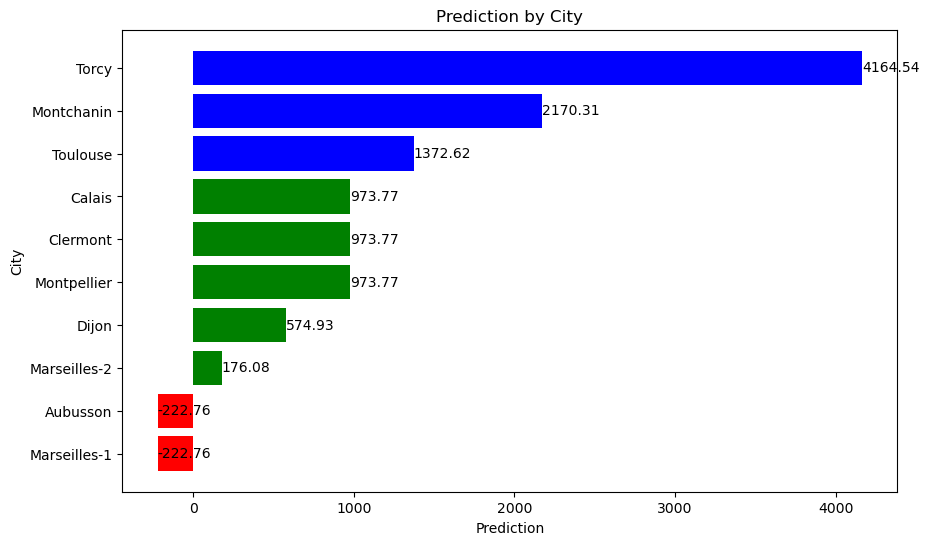

In [43]:
plt.figure(figsize=(10,6))

colors = ['blue' if i < 3 else 'red' if i >= len(croqpain_new_loc) - 2 else 'green' for i in range(len(croqpain_new_loc))]

bars = plt.barh(croqpain_new_loc['CITY'], croqpain_new_loc['Prediction'], color=colors)
plt.xlabel('Prediction')
plt.ylabel('City')
plt.title('Prediction by City')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center')

plt.gca().invert_yaxis()  
plt.show()

# 5. Interpretation and Conclusion:
### Highest Predicted Earnings: 
- The store in Torcy is predicted to have the highest earnings, with an estimated $4,164.543 thousand. This suggests a highly favorable competitive environment or other location-specific advantages that could make Torcy an attractive option for expansion.

### Mid-Range Predictions: 
- Locations in Montchanin and Toulouse show promising earnings potential as well, with predictions of $2,170.313 thousand and $1,372.621 thousand, respectively. These areas might represent balanced competitive conditions that still allow for significant profitability.

### Lower-Tier Predictions: 
- Calais, Clermont, and Montpellier are grouped closely with predicted earnings around $973.775 thousand. This indicates a moderate level of expected earnings, possibly reflecting denser competitive landscapes or other factors that moderately impact profitability.

### Lowest Predicted Earnings: 
- Dijon, with a predicted earning of $574.929 thousand, followed by Marseilles-2 and Marseilles-1, with the lowest predictions of $176.083 thousand and -$222.763 thousand, respectively, suggest challenging conditions. The negative prediction for Marseilles-1 indicates potential operational losses, highlighting the importance of careful consideration and further analysis before proceeding with expansion in areas with less favorable projections.

### Strategic Implications
- Market Entry and Expansion: The predictions suggest prioritizing expansion in cities like Torcy, Montchanin, and Toulouse, which offer the highest potential earnings according to the model. These areas could be key targets for market entry or expansion efforts.

- Risk Assessment: The lower or negative predicted earnings for locations like Dijon, Marseilles-2, and Marseilles-1 underscore the importance of thorough market analysis and risk assessment. Negative earnings projections, in particular, suggest a need for caution and perhaps reconsideration of expansion into those areas.

## In conclusion, the model's predictions offer a strategic overview of where the CroqPain restaurant chain might focus its expansion efforts to maximize earnings, highlighting the importance of considering competitive dynamics and local market conditions in the decision-making process.